<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

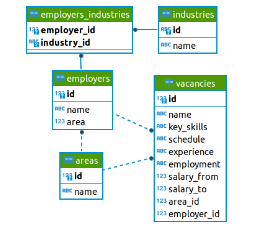

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select count(v.id) "Количество вакансий"
            from public.vacancies v
            
            '''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select count(emp.id) "Количество работодателей"
            from public.employers emp
            
            '''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select count(ar.id) "Количество регионов"
            from public.areas ar
            
            '''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''select count(ind.id) "Количество сфер деятельности"
            from public.industries ind
            
            '''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,Количество сфер деятельности
0,294


***

### выводы по предварительному анализу данных
В выборке представлено **23501** работодателей, которые разместили **49197** вакансий в 
**1362** регионах.
Вакансии представлены в дастаточно широком спектре сфер деятельности - **294**.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
n = 5
query_4_1 = f'''select 
                     count(v.id) cnt, 
                     a.name area     
                   --соединяем таблицу vacancies и areas
                   --групируем по названию региона сортируем по убыванию  
               from  
                     public.vacancies v 
                     full join public.areas a on v.area_id = a.id
               group by 2
               order by 1 desc
               limit {n} --выводим первые 5 строк
            '''

In [13]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''select 
                     count(*) "Кол-во вакансий" --количество вакансий с хотя бы одним
                     --заполненным полем с зарплатой
                     
                from 
                  public.vacancies v
                     
                -- условие для предиката по хотя бы одному заполненному  полю
                where v.salary_from is not null or salary_to is not null
             '''  

In [15]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,Кол-во вакансий
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''select 
                     round(avg(salary_from)) average_low, -- среднее для нижней границы
                     round(avg(salary_to)) average_upper  -- среднее для верхней границы
                     
               from 
                     public.vacancies
             '''

In [17]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,average_low,average_upper
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''select 
                    count(id) "К-во вакансий", 
                    schedule "Рабочий график",
                    employment "Тип трудоустройства"            
                     
                from 
                     public.vacancies 

                  group by   schedule,  employment -- группируем по 2 и 3
                  order by 1 desc -- сортируем по убыванию
                  offset 1 -- отсекаем 1 строку
                  limit 1 -- вывод первой стороку (второе место)
            '''

In [19]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,К-во вакансий,Рабочий график,Тип трудоустройства
0,7802,Удаленная работа,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''select 
                     count(id),
                     experience "Опыт работы"
                     
                from 
                     public.vacancies
                group by experience -- группируем по 2
                order by 1 asc      -- сортировка по возрастанию к-ва вакансий
              '''

In [21]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,count,Опыт работы
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

### выводы по детальному анализу вакансий
Лидерами среди регионов по количеству размещенных вакансий являются мегаполисы с развитой промышленностью и развитой хозяйственной инфраструктурой для которых требуется большое количество персонала.<br>
Почти у половины вакансий не указан размер зарплаты, это может означать что рынок достаточно гибкий для индивидуальных предложений будущим кадрам. Среднее значение по нижней границе ЗП - **71065**
по верхней границе ЗП - **110537**.<br>
Наиболее востребованные работники - работники на полный рабочий день с поной занятностью с опытом работы 
от **1** до **3** лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1 = f'''(select 
                    emp.name "работодатель",
                    count(v.id) "к-во вакансий"    
                from 
                     public.vacancies v
                join public.employers emp on v.employer_id = emp.id
                group by 1
                order by 2 desc --сортируем в порядке убывания по кол-ву вакансий
                limit 1) -- выводим работодателя на 1 месте
                
                union all -- объединяем таблицы чтобы вывести работодателей на 1 и 5 месте
                
                (select 
                    emp.name, 
                    count(v.id)   
                from 
                     public.vacancies v
                join public.employers emp on v.employer_id = emp.id
                group by 1
                order by 2 desc 
                offset 4 -- отсекаем первые 4 строки
                limit 1)
               '''

In [23]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,работодатель,к-во вакансий
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
query_5_2 = f'''select 
                    a.name "Регион",
                    count(emp.id) "Кол-во работодателей"                   
                     
                from 
                    public.areas a
                    full join public.employers emp on a.id = emp.area
                    full join public.vacancies v on a.id = v.area_id
                group by 1 
                having count(v.id) = 0 -- выделяем регионы где нет вакансий 
                order by 2 desc -- сортируем по убыванию кол-ва работодателей              
            '''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,Регион,Кол-во работодателей
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Ростовская область,18
...,...,...
588,Струнино,0
589,Славгород (Алтайский край),0
590,Сорочинск,0
591,Ленинский (Тульская область),0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
query_5_3 = f'''select
                    emp.name "Работодатель",
                    count(distinct v.area_id) "Кол-во регионов" --считаем только уникальные регионы
                                         
                from 
                    public.vacancies v
                    full join public.employers emp on v.employer_id = emp.id --внешнее соединение
                group by 1  
                order by 2 desc -- сортировка по убыванию                              
            '''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,Работодатель,Кол-во регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_5_4 = f'''select
                    count(*) "Кол-во работодателей"
                            
                from 
                    public.employers_industries ind
                    right join public.employers emp on ind.employer_id = emp.id
                where industry_id is null -- условие отсутствия сферы деятельности                     
            '''

In [29]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,Кол-во работодателей
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
query_5_5 = f'''select
                    emp.name "Название компании"
                    
                    
                from 
                    public.employers_industries ind
                    full join public.employers emp on ind.employer_id = emp.id
                group by 1
                having count(ind.industry_id) = 4  -- фильтр на наличие 4 сфер деятельности
                order by 1
                offset 2 -- отрезаем первые 2 строки
                limit 1  -- выводим 1 строку (изначально 3)
             '''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,Название компании
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_5_6 = f'''select
                    count(e_ind.employer_id) "Количество работодателей"
                    
                    
                from 
                    public.employers_industries e_ind
                    left join public.industries ind on e_ind.industry_id = ind.id
                where ind.name = 'Разработка программного обеспечения'
             '''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,Количество работодателей
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [45]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
tables = pd.read_html(url)
city_df = tables[1]
city_list = list(city_df['Город'])
city_list[13] = 'Воронеж'
display(city_list)

ImportError: lxml not found, please install it

In [46]:
# текст запроса
query_5_7 = f'''select
                    a.name "Регионы-миллионники", --регионы в которы представлена компания "Яндекс"
                    count(v.id) "Кол-во вакансий" --кол-во вакансий "Яндекса" в этих регионах
                       
                from 
                    public.vacancies v
                    left join public.employers emp  on v.employer_id = emp.id
                    left join public.areas a on v.area_id = a.id
                where emp.name = 'Яндекс' and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 
                'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 
                'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
                group by a.name
                
                union all
                
                select
                    'Total', -- добавляем строку с общим количеством вакансий
                    count(*)
                    
                from 
                    public.vacancies v
                    left join public.employers emp  on v.employer_id = emp.id
                    left join public.areas a on v.area_id = a.id
                where emp.name = 'Яндекс' and a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 
                'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 
                'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')   
                order by 2 asc
             '''

In [47]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_12716\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,Регионы-миллионники,Кол-во вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### выводы по анализу работодателей
По количеству вакансий лидирует компания "Яндекс" **1933** вакансии примерно **4%** от общего количества.
Среди регионов попадаются те в которых нет вакансий, но есть работодатели. 
По количеству регионов в которых размещены вакансии компании, ожидаемо лидирует "Яндекс", на втором месте компания "Ростелеком". Возможно это связано с тем, что сферы деятельности "Яндекса" в основном связаны с IT и это позволяет иметь достаточно большой штат сотрудников на "удаленке" в различных регионах и даже странах, а у "Ростетелекома" развитая сеть представительств (которые физически существуют) по всей России.
количество компаний у которых указано **4** сферы деятельности **1136**, компаний, занимающихся разработкой ПО, **3553**. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [34]:
# текст запроса
query_6_1 = f'''select
                    count(v.name) as "Вакансии, связанные с данными"
                       
                from public.vacancies v
                WHERE lower(v.name) LIKE '%data%' OR lower(v.name) LIKE '%данн%'
             '''   

In [35]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,"Вакансии, связанные с данными"
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [36]:
# текст запроса
query_6_2 = f'''select
                    count(v.id) as "Вакансии DS-junior"
                       
                from public.vacancies v
                where (lower(v.name) like '%data scientist%' or 
                lower(v.name) like '%data science%' or
                lower(v.name) like '%исследователь данных%' or
                (v.name like '%ML%' and v.name not like '%HTML%') or
                lower(v.name) like '%machine learning%' or
                lower(v.name) like '%машинн%обучен%%')
                and
               (v.experience like '%Нет опыта%' or
                v.experience like '%Стажировка%'or
                lower(v.name) like '%junior%')
                
             '''   

In [37]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,Вакансии DS-junior
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [38]:
# текст запроса
query_6_3 = f'''select
                    count(v.id) as "Вакансии SQL или postgres"
                       
                from public.vacancies v
                where (lower(v.name) like '%data scientist%' or 
                lower(v.name) like '%data science%' or
                lower(v.name) like '%исследователь данных%' or
                (v.name like '%ML%' and v.name not like '%HTML%') or
                lower(v.name) like '%machine learning%' or
                lower(v.name) like '%машинн%обучен%%')       
                and 
                (v.key_skills like '%SQL%' or v.key_skills like '%postgres%')
                
             '''   

In [39]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,Вакансии SQL или postgres
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [40]:
# текст запроса
query_6_4 = f'''select
                    count(v.id) as "Вакансии Python"
                       
                from public.vacancies v
                where (lower(v.name) like '%data scientist%' or 
                lower(v.name) like '%data science%' or
                lower(v.name) like '%исследователь данных%' or
                (v.name like '%ML%' and v.name not like '%HTML%') or
                lower(v.name) like '%machine learning%' or
                lower(v.name) like '%машинн%обучен%%')       
                and 
                (v.key_skills LiKE '%Python%')
                
             '''   

In [41]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,Вакансии Python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [42]:
# текст запроса
query_6_5 = f'''select
                     round(avg(LENGTH(v.key_skills) - 
                     LENGTH(replace(v.key_skills, chr(9), '')) + 1), 2) as "Среднее к-во скилов"
                       
                from public.vacancies v
                where (lower(v.name) like '%data scientist%' or 
                lower(v.name) like '%data science%' or
                lower(v.name) like '%исследователь данных%' or
                (v.name like '%ML%' and v.name not like '%HTML%') or
                lower(v.name) like '%machine learning%' or
                lower(v.name) like '%машинн%обучен%%')       
                
                
             '''   

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,Среднее к-во скилов
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [44]:
# текст запроса
query_6_6 = f'''select
                     round(avg(coalesce((salary_from+salary_to)/2, 
                     salary_from, salary_to))) "Средняя ЗП DS с опытом 3-6 лет"
    
                       
                from public.vacancies v
                where (lower(v.name) like '%data scientist%' or 
                lower(v.name) like '%data science%' or
                lower(v.name) like '%исследователь данных%' or
                (v.name like '%ML%' and v.name not like '%HTML%') or
                lower(v.name) like '%machine learning%' or
                lower(v.name) like '%машинн%обучен%%') 
                and
                (v.salary_from is not null or salary_to is not null)   
                and 
                (v.experience = 'От 3 до 6 лет')    
                                
             '''  

In [45]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_10824\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,Средняя ЗП DS с опытом 3-6 лет
0,243115.0


In [46]:
connection.close() #закрываем соединение

***

### выводы по предметному анализу
Вакансий, связанных с данными, **1771**, при этом для junior DS из общего числа только **51** вакансия.
**201** вакансия для DS требует в качестве ключевого навыка SQL или postgres, а python **351** вакансия.
В вакансиях для DS в среднем указывают более 6 ключевых навыков.
DS с опытом работы **3-6** лет может расчитывать в среднем на ЗП в **243115** руб.


# Общий вывод по проекту

* В выборке представлены **49197** вакансий от **23501** работодателей в 
**1362** регионах по **294** сферам деятельности.
* Лидерами среди регионов по количеству размещенных
вакансий являются регионы - мегаполисы с развитой промышленностью и развитой 
хозяйственной инфраструктурой. 
* Среднее значение по нижней границе ЗП - **71065**, по верхней границе ЗП - **110537**.
Наиболее востребованные работники - работники на полный рабочий день с полной занятностью с опытом работы от **1** до **3** лет.
* По количеству вакансий лидирует компания "Яндекс" - **1933** вакансии примерно **4%** от общего количества. По количеству регионов в которых размещены вакансии компании, ожидаемо лидирует "Яндекс", на втором месте компания "Ростелеком". Возможно это связано с тем, что сферы деятельности "Яндекса" в основном связаны с IT и это позволяет иметь достаточно большой штат сотрудников на "удаленке" в различных регионах и даже странах, а у "Ростетелекома" развитая сеть представительств (которые физически существуют) по всей России.
* У примерно **36%** работодателей не указана сфера деятельности. Количество компаний у которых указано **4** и более сферы деятельности **2415**; компаний, занимающихся разработкой ПО, **3553** - более **15%**. 
* Вакансий, связанных с данными, **1771**, при этом для junior DS из общего числа только **51** вакансия.
**201** вакансия для DS требует в качестве ключевого навыка SQL или postgres, а python **351** вакансия.
В вакансиях для DS в среднем указывают более **6** ключевых навыков.
DS с опытом работы **3-6** лет может расчитывать в среднем на ЗП в **243115** руб.
